## **觀察 台灣空氣品質 (AQI)**

* Data: [空氣品質指標(AQI)](https://data.gov.tw/dataset/40448)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

air_df = pd.read_csv('./dataset/air_quality.csv')

print(air_df.shape)  # rows:85, columns:24

print(air_df.info())

(85, 24)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 24 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   sitename     85 non-null     object 
 1   county       85 non-null     object 
 2   aqi          84 non-null     float64
 3   pollutant    71 non-null     object 
 4   status       84 non-null     object 
 5   so2          83 non-null     float64
 6   co           84 non-null     float64
 7   o3           84 non-null     float64
 8   o3_8hr       84 non-null     float64
 9   pm10         84 non-null     float64
 10  pm2.5        83 non-null     float64
 11  no2          83 non-null     float64
 12  nox          83 non-null     float64
 13  no           83 non-null     float64
 14  wind_speed   82 non-null     object 
 15  wind_direc   81 non-null     object 
 16  publishtime  85 non-null     object 
 17  co_8hr       84 non-null     float64
 18  pm2.5_avg    84 non-null     float64
 19  p

In [4]:
air_df.head(2)

,sitename,county,aqi,pollutant,status,so2,co,o3,o3_8hr,pm10,...,wind_speed,wind_direc,publishtime,co_8hr,pm2.5_avg,pm10_avg,so2_avg,longitude,latitude,siteid
0,基隆,基隆市,67.0,細懸浮微粒,普通,0.7,0.36,61.6,58.9,53.0,...,1.7,98,2023/04/07 22:00:00,0.3,22.0,39.0,0.0,121.760056,25.129167,1
1,汐止,新北市,65.0,細懸浮微粒,普通,0.7,0.33,56.7,51.3,41.0,...,2.4,37,2023/04/07 22:00:00,0.3,21.0,34.0,0.0,121.640810,25.066240,2


In [5]:
# 空氣品質最好的前10名
air_df_sorted = air_df.sort_values(by='aqi')
air_first10 = air_df_sorted.head(10)
set(air_first10['county'])

{'南投縣', '宜蘭縣', '屏東縣', '臺中市', '臺東縣', '花蓮縣'}

In [6]:
# 空氣品質最差的前10名
air_last10 = air_df_sorted.tail(10)
set(air_last10['county'])

{'新北市', '桃園市', '雲林縣', '高雄市'}

c:\Users\USER\anaconda3\lib\site-packages\geopandas\geodataframe.py:1443: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


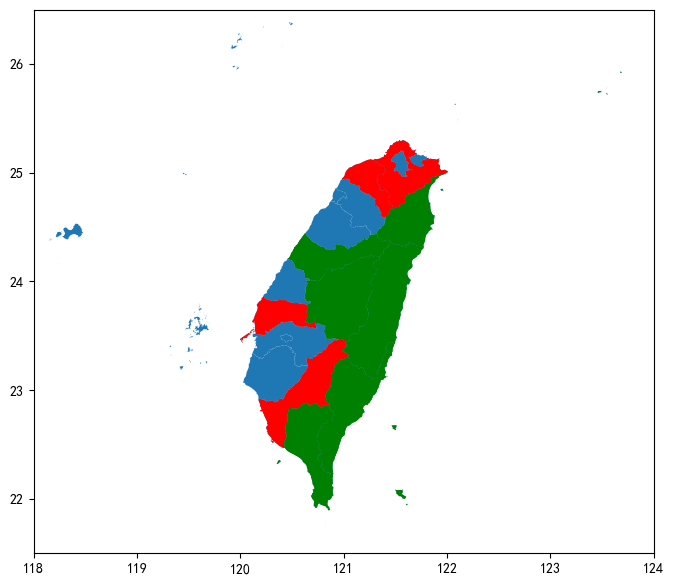

In [7]:
import geopandas as gpd
import matplotlib.pyplot as plt
## 各鄉鎮市區
# taiwan = gpd.read_file('./mapdata202303230423/TOWN_MOI_1120317.shp', encoding='utf-8') 

# 縣市
taiwan = gpd.read_file('./mapdata202301070205/COUNTY_MOI_1090820.shp', encoding='utf-8')

fig, ax = plt.subplots(figsize=(8,8))

# 繪製台灣地圖
taiwan.plot(ax=ax)

# AQI好的城市: 綠色，AQI差的城市: 紅色
county_color = {'南投縣':'green', 
                '宜蘭縣':'green',
                '屏東縣':'green',
                '臺中市':'green',
                '臺東縣':'green',
                '花蓮縣':'green',
                '新北市':'red', 
                '桃園市':'red',
                '雲林縣':'red',
                '高雄市':'red'}
county_data = taiwan[taiwan['COUNTYNAME'].isin(county_color.keys())]
county_data['color'] = county_data['COUNTYNAME'].apply(lambda x: county_color[x])

# 疊上顏色
county_data.plot(ax=ax, color=county_data['color'])

# 設定圖的範圍
ax.set_xlim(118, 124)
ax.set_ylim(21.5, 26.5)

# 顯示地圖
plt.show()

In [188]:
for col in air_df.columns:
    # print(col)
    pass

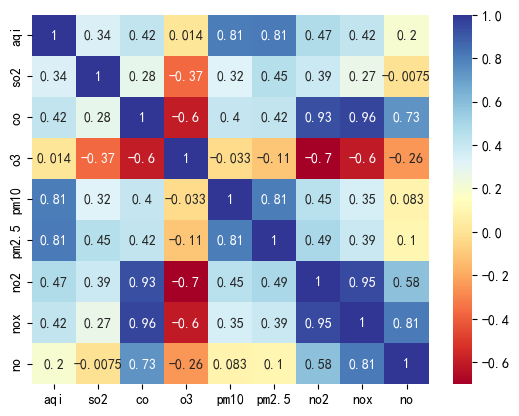

In [8]:
# 相關係數圖
import seaborn as sns

corr = air_df[['aqi', 'so2', 'co', 'o3', 'pm10', 'pm2.5', 'no2', 'nox', 'no']].corr()
sns.heatmap(corr, annot=True, cmap='RdYlBu')
plt.show()